# General Information
>
>Author: Lucas Lobianco De Matheo
>
>Title: **Melbourne Housing Market**  
> - Melbourne housing clearance data from Jan 2016
>
>  
>*This dataset was obtained from Kaggle*
>
> **Kaggle Context:**  
> This data was scraped from publicly available results posted every week from domain.com.au, I've cleaned it as best I can, now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.
>
>**Extension:** .csv
>
>**Source:** https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market  
>
>**Date:** 04-08-2022
>
> **Main Skills of this project:** 
> - **Machine Learning**
> - **Forecasting**  
> - **Time Series** 
> - **Regression**
> - **Data Visualization**

# Objective
> Understand the behavior of the realestate market  
> Predict future prices

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = None

# Importing Data

In [3]:
path = r'C:\Users\lucas\OneDrive\Documents\TI\DataScience\Projects\Melbourne Housing Market\Data_for_ML_MelbourneHousingMarket.csv'
df = pd.read_csv(path)

In [4]:
df

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,BuildingArea,YearBuilt,TypeCat,PostCodeCat,CouncilAreaCat,PropertycountCat,Date
0,2.0,1.035000e+06,2.5,2.0,1.0,0.0,79.0,1900.0,5.0,4.0,6.0,4.0,2016-02-04
1,3.0,1.465000e+06,2.5,3.0,2.0,0.0,150.0,1900.0,5.0,4.0,6.0,4.0,2017-03-04
2,4.0,1.600000e+06,2.5,3.0,1.0,2.0,142.0,2014.0,5.0,4.0,6.0,4.0,2016-06-04
3,4.0,1.400000e+06,2.5,3.0,2.0,2.0,220.0,2006.0,5.0,4.0,6.0,4.0,2016-08-06
4,3.0,1.876000e+06,2.5,4.0,2.0,0.0,210.0,1910.0,5.0,4.0,6.0,4.0,2016-05-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12748,3.0,5.700000e+05,25.5,3.0,2.0,2.0,158.0,2012.0,5.0,2.0,3.0,2.0,2018-02-24
12749,3.0,5.213333e+05,25.5,3.0,2.0,2.0,135.0,2016.0,5.0,2.0,3.0,2.0,2018-02-24
12750,2.0,8.880000e+05,6.3,2.0,2.0,1.0,104.0,2018.0,5.0,3.0,4.0,3.0,2018-02-24
12751,2.0,7.050000e+05,6.3,2.0,1.0,2.0,120.0,2000.0,2.0,3.0,4.0,3.0,2018-02-24


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12753 entries, 0 to 12752
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rooms             12753 non-null  float64
 1   Price             12753 non-null  float64
 2   Distance          12753 non-null  float64
 3   Bedroom2          12753 non-null  float64
 4   Bathroom          12753 non-null  float64
 5   Car               12753 non-null  float64
 6   BuildingArea      12753 non-null  float64
 7   YearBuilt         12753 non-null  float64
 8   TypeCat           12753 non-null  float64
 9   PostCodeCat       12753 non-null  float64
 10  CouncilAreaCat    12753 non-null  float64
 11  PropertycountCat  12753 non-null  float64
 12  Date              12753 non-null  object 
dtypes: float64(12), object(1)
memory usage: 1.3+ MB


In [6]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y/%m/%d') # Formatting Data

In [7]:
date_saved = df['Date']

# Preparing the first prediction via multiple regression

## Normalizing

In [8]:
df = df.drop('Date', axis=1)

from sklearn.preprocessing import StandardScaler
df_scaler = StandardScaler()
df_scaler.fit(df)
scaled_inputs = df_scaler.transform(df)

df.columns.values
scaled_inputs = pd.DataFrame(scaled_inputs)
scaled_inputs.columns = df.columns.values

In [9]:
scaled_inputs

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,BuildingArea,YearBuilt,TypeCat,PostCodeCat,CouncilAreaCat,PropertycountCat
0,-1.179688,-0.127518,-1.280144,-1.155051,-0.936073,-1.723834,-0.916936,-1.892740,0.566284,0.217307,0.561451,0.206301
1,-0.154225,0.505871,-1.280144,-0.130829,0.419410,-1.723834,-0.056158,-1.892740,0.566284,0.217307,0.561451,0.206301
2,0.871237,0.704726,-1.280144,-0.130829,-0.936073,0.276262,-0.153147,1.324817,0.566284,0.217307,0.561451,0.206301
3,0.871237,0.410126,-1.280144,-0.130829,0.419410,0.276262,0.792497,1.099024,0.566284,0.217307,0.561451,0.206301
4,-0.154225,1.111274,-1.280144,0.893394,0.419410,-1.723834,0.671260,-1.610498,0.566284,0.217307,0.561451,0.206301
...,...,...,...,...,...,...,...,...,...,...,...,...
12748,-0.154225,-0.812462,1.998003,-0.130829,0.419410,0.276262,0.040831,1.268369,0.566284,-1.114416,-1.165004,-1.112143
12749,-0.154225,-0.884148,1.998003,-0.130829,0.419410,0.276262,-0.238012,1.381266,0.566284,-1.114416,-1.165004,-1.112143
12750,-1.179688,-0.344049,-0.738537,-1.155051,0.419410,-0.723786,-0.613845,1.437714,0.566284,-0.448554,-0.589519,-0.452921
12751,-1.179688,-0.613607,-0.738537,-1.155051,-0.936073,0.276262,-0.419867,0.929679,-1.311791,-0.448554,-0.589519,-0.452921


## Separating Attributes

In [10]:
y = scaled_inputs['Price'] # target variable
X = scaled_inputs.drop('Price', axis=1) 
#X = X.drop('Date', axis=1)

## Separating training from testing data

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Multiple regression

In [12]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [13]:
print(regr.coef_)

[ 0.13636502 -0.14283344 -0.03374554  0.13293954  0.04817902  0.31237905
 -0.19314933  0.14608395  0.14500568  0.14084342  0.16934115]


## Evaluating the model

In [14]:
X_test = X_test.reset_index()
X_test = X_test.drop('index', axis=1)

In [15]:
y_test = y_test.reset_index()
y_test = y_test.drop('index', axis=1)

In [16]:
predicted = regr.predict(X_test)

In [17]:
predicted

array([-0.62000303, -0.43912522,  0.56386077, ...,  0.44919227,
       -0.19801405, -0.22425663])

In [18]:
test_df = X_test.copy()
test_df['Price'] = y_test

In [19]:
test_df['Predicted'] = predicted

In [20]:
test_df

,Rooms,Distance,Bedroom2,Bathroom,Car,BuildingArea,YearBuilt,TypeCat,PostCodeCat,CouncilAreaCat,PropertycountCat,Price,Predicted
0,-1.179688,-0.895318,-1.155051,-0.936073,-0.723786,-0.553227,0.788558,0.566284,-0.448554,-0.589519,-0.452921,-0.296913,-0.620003
1,-0.154225,0.344677,-0.130829,0.419410,0.276262,-0.419867,0.901454,-1.937815,0.217307,0.561451,0.206301,-0.142248,-0.439125
2,0.871237,0.330424,0.893394,0.419410,3.276406,0.307551,0.082953,0.566284,0.217307,0.561451,0.206301,-0.488403,0.563861
3,-1.179688,-0.538997,-1.155051,-0.936073,-0.723786,-0.953307,0.224074,-1.937815,2.214890,1.712421,2.183966,-0.654851,0.104308
4,-0.154225,-0.439228,-0.130829,-0.936073,-0.723786,-0.444114,-0.763773,0.566284,3.546613,1.712421,3.502409,0.573138,1.327378
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3821,-0.154225,-0.011643,-0.130829,1.774892,0.276262,0.271180,1.324817,-1.311791,0.217307,0.561451,0.206301,0.461681,0.017515
3822,0.871237,0.929042,0.893394,0.419410,0.276262,0.659137,0.365195,0.566284,-0.448554,-0.589519,-0.452921,-0.282183,0.018834
3823,-0.154225,-0.339458,-0.130829,0.419410,0.276262,1.131958,1.211921,0.566284,0.217307,0.561451,0.206301,1.173631,0.449192
3824,0.871237,-0.040149,0.893394,-0.936073,-0.723786,0.125697,-0.340410,0.566284,-1.114416,-0.589519,-0.452921,-0.289548,-0.198014


<Figure size 1080x504 with 0 Axes>

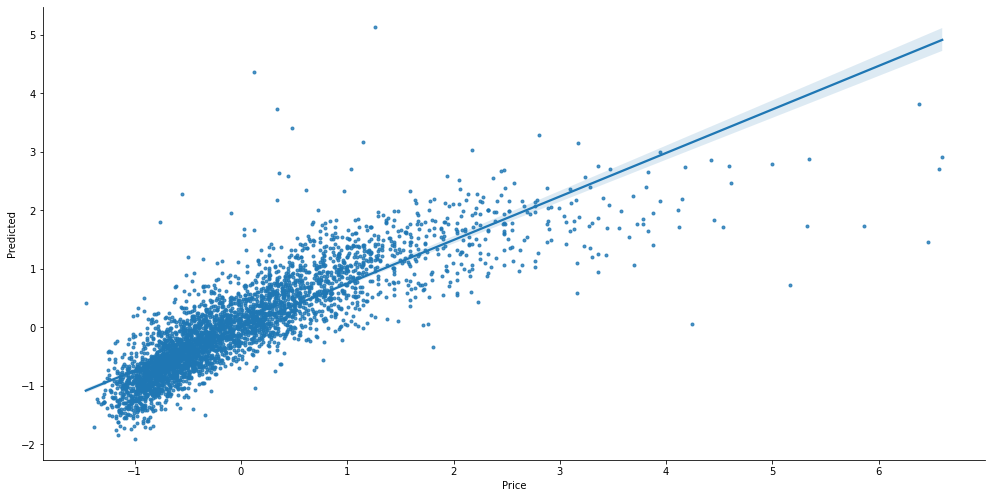

In [21]:
plt.figure(figsize = (15,7))
sns.pairplot(test_df, hue=None, hue_order=None, palette='tab10', vars=None, x_vars='Price', y_vars='Predicted', 
             kind='reg', diag_kind='auto', markers='.', height=7, aspect=2, 
             corner=False, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None)
plt.show()

In [22]:
x = np.array(test_df['Price']).reshape((-1, 1))
y = np.array(test_df['Predicted'])

from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x, y)

In [23]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.7158795656980228
intercept: 0.0016348283770848432
slope: [0.74435465]


In [24]:
test_df

,Rooms,Distance,Bedroom2,Bathroom,Car,BuildingArea,YearBuilt,TypeCat,PostCodeCat,CouncilAreaCat,PropertycountCat,Price,Predicted
0,-1.179688,-0.895318,-1.155051,-0.936073,-0.723786,-0.553227,0.788558,0.566284,-0.448554,-0.589519,-0.452921,-0.296913,-0.620003
1,-0.154225,0.344677,-0.130829,0.419410,0.276262,-0.419867,0.901454,-1.937815,0.217307,0.561451,0.206301,-0.142248,-0.439125
2,0.871237,0.330424,0.893394,0.419410,3.276406,0.307551,0.082953,0.566284,0.217307,0.561451,0.206301,-0.488403,0.563861
3,-1.179688,-0.538997,-1.155051,-0.936073,-0.723786,-0.953307,0.224074,-1.937815,2.214890,1.712421,2.183966,-0.654851,0.104308
4,-0.154225,-0.439228,-0.130829,-0.936073,-0.723786,-0.444114,-0.763773,0.566284,3.546613,1.712421,3.502409,0.573138,1.327378
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3821,-0.154225,-0.011643,-0.130829,1.774892,0.276262,0.271180,1.324817,-1.311791,0.217307,0.561451,0.206301,0.461681,0.017515
3822,0.871237,0.929042,0.893394,0.419410,0.276262,0.659137,0.365195,0.566284,-0.448554,-0.589519,-0.452921,-0.282183,0.018834
3823,-0.154225,-0.339458,-0.130829,0.419410,0.276262,1.131958,1.211921,0.566284,0.217307,0.561451,0.206301,1.173631,0.449192
3824,0.871237,-0.040149,0.893394,-0.936073,-0.723786,0.125697,-0.340410,0.566284,-1.114416,-0.589519,-0.452921,-0.289548,-0.198014


# Evaluating other possibilities

In [25]:
df.columns.values

array(['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'BuildingArea', 'YearBuilt', 'TypeCat', 'PostCodeCat',
       'CouncilAreaCat', 'PropertycountCat'], dtype=object)

In [34]:
y = df['Price']
X = df.drop('Price', axis=1)
#X = X.drop('Date', axis=1)
#X = df[['PropertycountCat']] # to investigate each attribute individualy

#X = df[['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'BuildingArea', 'PostCodeCat', 'CouncilAreaCat', 'PropertycountCat']]
#X = df[['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'BuildingArea', 'YearBuilt', 'TypeCat', 'PostCodeCat','CouncilAreaCat', 'PropertycountCat']]
#X = df[['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'BuildingArea', 'YearBuilt', 'TypeCat', 'PostCodeCat','CouncilAreaCat', 'PropertycountCat']]
X = df[['BuildingArea', 'PostCodeCat','PropertycountCat']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

X_test = X_test.reset_index()
X_test = X_test.drop('index', axis=1)

y_test = y_test.reset_index()
y_test = y_test.drop('index', axis=1)

predicted = regr.predict(X_test)
    
test_df = X_test.copy()
test_df['Price'] = y_test

test_df['Predicted'] = predicted

<Figure size 1080x504 with 0 Axes>

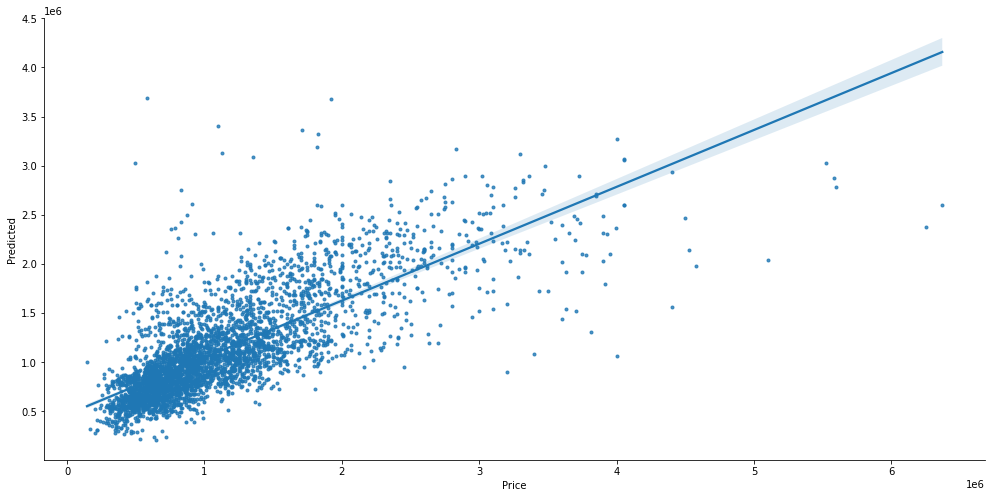

In [35]:
plt.figure(figsize = (15,7))
sns.pairplot(test_df, hue=None, hue_order=None, palette='tab10', vars=None, x_vars='Price', y_vars='Predicted', 
             kind='reg', diag_kind='auto', markers='.', height=7, aspect=2, 
             corner=False, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None)
plt.show()

In [36]:
x = np.array(test_df['Price']).reshape((-1, 1))
y = np.array(test_df['Predicted'])

model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.5861363875127225
intercept: 468383.179572609
slope: [0.57914119]


In [33]:
test_df

,Rooms,Distance,Bedroom2,Bathroom,BuildingArea,YearBuilt,TypeCat,PostCodeCat,CouncilAreaCat,PropertycountCat,Price,Predicted
0,3.0,23.0,3.0,2.0,208.0,2012.0,5.0,3.0,4.0,3.0,1.175000e+06,8.739775e+05
1,4.0,20.6,4.0,2.0,224.0,1996.0,5.0,2.0,2.0,2.0,6.000000e+05,8.443509e+05
2,3.0,11.7,3.0,1.0,138.0,1970.0,5.0,3.0,3.0,3.0,8.400000e+05,8.188151e+05
3,4.0,8.2,4.0,2.0,244.0,1915.0,5.0,3.0,4.0,3.0,1.435000e+06,1.607109e+06
4,4.0,27.2,4.0,2.0,155.0,2011.0,5.0,2.0,2.0,2.0,5.601667e+05,5.169469e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
3821,2.0,9.2,2.0,1.0,63.0,1970.0,1.0,6.0,8.0,6.0,5.616667e+05,9.927298e+05
3822,4.0,7.5,4.0,2.0,147.0,1925.0,5.0,4.0,6.0,4.0,1.507000e+06,1.572609e+06
3823,3.0,35.5,3.0,2.0,149.0,1996.0,5.0,1.0,3.0,1.0,6.010000e+05,2.837954e+05
3824,3.0,9.5,3.0,2.0,153.0,1980.0,5.0,3.0,6.0,3.0,1.100000e+06,1.148328e+06


PropertycountCat: 0.39  
PostCodeCat: 0.35   
BuildingArea: 0.30   

CouncilAreaCat: 0.26    
Room: 0.23  
Bedroom2: 0.22  
Bathroom: 0.20          

TypeCat: 0.12   
YearBuilt: 0.09  
Distance: 0.06  
Car: 0.04 - Removed  

Multiple: 0.71

> **This model explains 70% of what influences the price of apartments, being useful for estimating the price of an apartment.**